In [54]:
import numpy as np
import pandas as pd

In [55]:
data = pd.read_csv(r'C:\Users\yekta\Desktop\Disease_symptom_and_patient_profile_dataset.csv', sep=',')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [57]:
# Viewing top 10 of the dataset
data.head(15)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [58]:
# Look at basic data discription including non numerical data values
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Disease,349,116,Asthma,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever,349,2,Yes,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cough,349,2,No,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fatigue,349,2,Yes,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difficulty Breathing,349,2,No,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,349.0,NaN,NaN,NaN,46.323782,13.08509,19.0,35.0,45.0,55.0,90.0
Gender,349,2,Female,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,349,3,High,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol Level,349,3,High,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outcome Variable,349,2,Positive,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
print(data.columns)


Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')


In [60]:
#Show Asthsma part
# First mask all other data except asthma
mask = data['Disease'] == 'Asthma'
# Get asthma data
asthma = data[mask]
asthma.head(10)


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
10,Asthma,Yes,No,No,Yes,28,Male,High,Normal,Positive
34,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive
35,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive
36,Asthma,Yes,Yes,Yes,Yes,30,Female,Normal,Normal,Positive
50,Asthma,No,No,No,Yes,31,Male,Normal,Low,Negative
56,Asthma,No,Yes,Yes,Yes,35,Female,Normal,High,Negative
57,Asthma,Yes,Yes,Yes,Yes,35,Female,Normal,Normal,Negative
58,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative


In [61]:
print(asthma.columns)


Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')


In [62]:
#Converting all neccesary non-numerical values into numerical values
a= {'No':0, 'Yes':1} # declare dictionary a

# Mapping values 0 and 1 to No and Yes respectively in Fever, Cough, and Difficulty Breathing columns
asthma['fever1'] = asthma['Fever'].map(a)
asthma['cough1'] = asthma['Cough'].map(a)
asthma['fatigue1'] = asthma['Fatigue'].map(a)
asthma['difficulty_breathing1'] = asthma['Difficulty Breathing'].map(a)


# declare dictionaries b and c
b= {'Low': 1, 'Normal': 2, 'High': 3}
c= {'Negative': 0, 'Positive': 1}

# Mapping values 1, 2, and 3 to Low, Normal, and High respectively in 'Blood Pressure' and 'Cholesterol Level' data columns
asthma['blood_pressure1'] = asthma['Blood Pressure'].map(b)
asthma['cholesterol_level1'] = asthma['Cholesterol Level'].map(b)


# Mapping values 0 and 1 to Negative and Positive respectively in 'Outcome Variable' data column
asthma['outcome_variable1'] = asthma['Outcome Variable'].map(c)


asthma.head(10)

C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\1170522471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma['fever1'] = asthma['Fever'].map(a)
C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\1170522471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma['cough1'] = asthma['Cough'].map(a)
C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\1170522471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,fever1,cough1,fatigue1,difficulty_breathing1,blood_pressure1,cholesterol_level1,outcome_variable1
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,1,1,0,1,2,2,1
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,1,1,0,1,2,2,1
10,Asthma,Yes,No,No,Yes,28,Male,High,Normal,Positive,1,0,0,1,3,2,1
34,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive,1,1,0,1,2,2,1
35,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive,1,1,0,1,2,2,1
36,Asthma,Yes,Yes,Yes,Yes,30,Female,Normal,Normal,Positive,1,1,1,1,2,2,1
50,Asthma,No,No,No,Yes,31,Male,Normal,Low,Negative,0,0,0,1,2,1,0
56,Asthma,No,Yes,Yes,Yes,35,Female,Normal,High,Negative,0,1,1,1,2,3,0
57,Asthma,Yes,Yes,Yes,Yes,35,Female,Normal,Normal,Negative,1,1,1,1,2,2,0
58,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative,0,1,1,1,3,2,0


In [63]:
#Selecting numerical columns from non numerical columns
asthma_data = asthma[['fever1', 'cough1', 
                          'fatigue1', 'difficulty_breathing1', 'Age', 
                         'blood_pressure1', 'cholesterol_level1', 
                          'outcome_variable1']]
asthma_data.head(10)

,fever1,cough1,fatigue1,difficulty_breathing1,Age,blood_pressure1,cholesterol_level1,outcome_variable1
3,1,1,0,1,25,2,2,1
4,1,1,0,1,25,2,2,1
10,1,0,0,1,28,3,2,1
34,1,1,0,1,30,2,2,1
35,1,1,0,1,30,2,2,1
36,1,1,1,1,30,2,2,1
50,0,0,0,1,31,2,1,0
56,0,1,1,1,35,2,3,0
57,1,1,1,1,35,2,2,0
58,0,1,1,1,35,3,2,0


In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

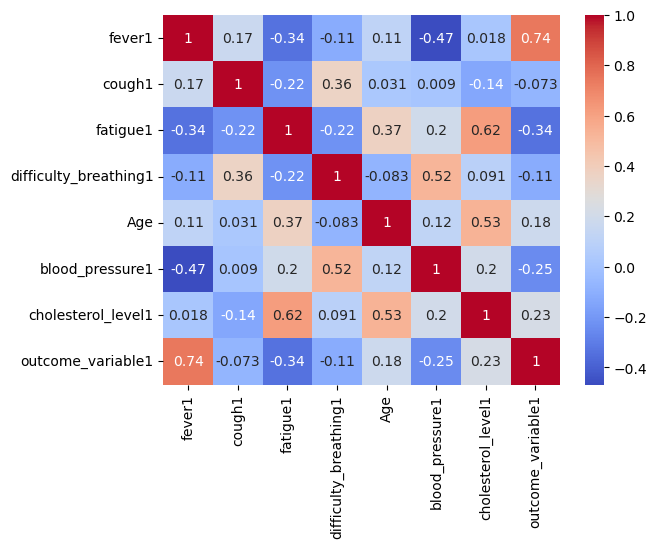

In [65]:
#Correlation Heat map
sns.heatmap(asthma_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [66]:
#Data for training model
finalData = asthma[[ 'fever1', 'cough1', 
            'fatigue1', 'difficulty_breathing1', 'Age',
            'blood_pressure1', 'cholesterol_level1', 
            'outcome_variable1']]
finalData.head(10)

,fever1,cough1,fatigue1,difficulty_breathing1,Age,blood_pressure1,cholesterol_level1,outcome_variable1
3,1,1,0,1,25,2,2,1
4,1,1,0,1,25,2,2,1
10,1,0,0,1,28,3,2,1
34,1,1,0,1,30,2,2,1
35,1,1,0,1,30,2,2,1
36,1,1,1,1,30,2,2,1
50,0,0,0,1,31,2,1,0
56,0,1,1,1,35,2,3,0
57,1,1,1,1,35,2,2,0
58,0,1,1,1,35,3,2,0


In [67]:
#Import libs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [68]:
print(finalData.columns)


Index(['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1', 'Age',
       'blood_pressure1', 'cholesterol_level1', 'outcome_variable1'],
      dtype='object')


In [69]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Fit and transform the encoder on the 'outcome_variable' column
outcome_encoded = one_hot_encoder.fit_transform(finalData[['outcome_variable1']])

# Convert the sparse matrix to a dense array
outcome_encoded_array = outcome_encoded.toarray()

# Create new column(s) for the one-hot encoding in the DataFrame
encoded_columns = one_hot_encoder.get_feature_names_out(['outcome_variable1'])
finalData[encoded_columns] = outcome_encoded_array

C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\631123128.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData[encoded_columns] = outcome_encoded_array
C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\631123128.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData[encoded_columns] = outcome_encoded_array


In [70]:
finalData.head(10)

,fever1,cough1,fatigue1,difficulty_breathing1,Age,blood_pressure1,cholesterol_level1,outcome_variable1,outcome_variable1_0,outcome_variable1_1
3,1,1,0,1,25,2,2,1,0.0,1.0
4,1,1,0,1,25,2,2,1,0.0,1.0
10,1,0,0,1,28,3,2,1,0.0,1.0
34,1,1,0,1,30,2,2,1,0.0,1.0
35,1,1,0,1,30,2,2,1,0.0,1.0
36,1,1,1,1,30,2,2,1,0.0,1.0
50,0,0,0,1,31,2,1,0,1.0,0.0
56,0,1,1,1,35,2,3,0,1.0,0.0
57,1,1,1,1,35,2,2,0,1.0,0.0
58,0,1,1,1,35,3,2,0,1.0,0.0


In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [72]:
print(finalData.columns)


Index(['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1', 'Age',
       'blood_pressure1', 'cholesterol_level1', 'outcome_variable1',
       'outcome_variable1_0', 'outcome_variable1_1'],
      dtype='object')


In [73]:
# Separate the features (X) and the target variable (y)
X = finalData[['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1', 'Age', 'blood_pressure1', 'cholesterol_level1']]
y = finalData['outcome_variable1']


# Define the number of top features you want to select
k = 7  # Adjust this value to the number of features you want to select

# Create an instance of SelectKBest with the chi2 scoring function
bestfeatures = SelectKBest(score_func=chi2, k=7)

# Fit and transform the selector on your feature data
fit = bestfeatures.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = bestfeatures.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Get the chi2 scores for the selected features
chi2_scores = bestfeatures.scores_[selected_feature_indices]

# Print the selected feature names and their chi2 scores
for feature, score in zip(selected_features, chi2_scores):
    print(f"Feature: {feature}, Chi2 Score: {score}")

Feature: fever1, Chi2 Score: 2.7709876543209875
Feature: cough1, Chi2 Score: 0.0320261437908497
Feature: fatigue1, Chi2 Score: 1.3828282828282832
Feature: difficulty_breathing1, Chi2 Score: 0.01262626262626268
Feature: Age, Chi2 Score: 1.2739693757361605
Feature: blood_pressure1, Chi2 Score: 0.15022222222222215
Feature: cholesterol_level1, Chi2 Score: 0.13616557734204773


In [74]:
# The index of the selected features
selected_feature_indices

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [75]:
# Selected Features
selected_features

Index(['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1', 'Age',
       'blood_pressure1', 'cholesterol_level1'],
      dtype='object')

In [76]:
# Chi2 Values
chi2_scores

array([2.77098765, 0.03202614, 1.38282828, 0.01262626, 1.27396938,
       0.15022222, 0.13616558])

In [77]:
#Model Training
X = finalData[selected_features]  # Independent variables = selected features
y = finalData['outcome_variable1']  # Dependent variable = outcome_variable1 (positive/negative)

# Fit data into models for training and testing. 70:30% train:test ratio used.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

models = [LogisticRegression(),
          LinearSVC(),
          SVC(kernel='poly'),
          DecisionTreeClassifier()]


In [78]:
#Models Evaluation
from sklearn.metrics import accuracy_score  # Import the accuracy_score function

# Determining accuracy of models used using accuracy score function
model_names=['LogisticRegression',
            'LinearSVM',
            'Polynomial',
            'DecisionTree']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
    
eval_acc={'Modeling Algorithm': model_names, 'Accuracy': acc}
eval_acc

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Modeling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'Polynomial',
  'DecisionTree'],
 'Accuracy': [0.7142857142857143,
  0.8571428571428571,
  0.7142857142857143,
  0.8571428571428571]}

In [79]:
# Creating a data frame for the accuracy results of the models used

acc_table = pd.DataFrame(eval_acc)
acc_table= acc_table.sort_values(by='Accuracy', ascending=[False]);
acc_table

,Modeling Algorithm,Accuracy
1,LinearSVM,0.857143
3,DecisionTree,0.857143
0,LogisticRegression,0.714286
2,Polynomial,0.714286


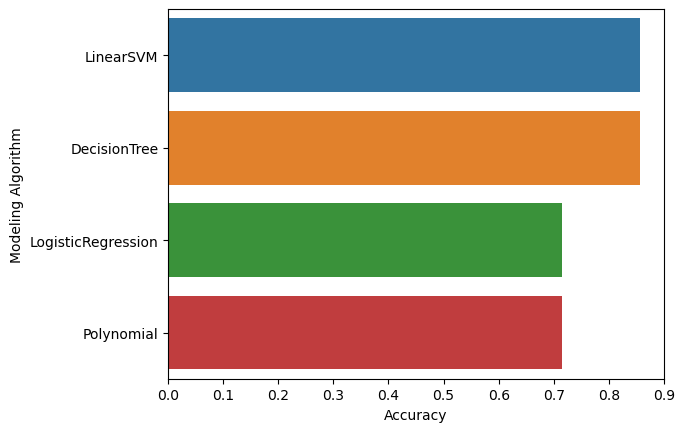

In [80]:
# Visualizing accuracy of models using barplot
sns.barplot(y= 'Modeling Algorithm', x= 'Accuracy', data=acc_table);

In [81]:
from sklearn.metrics import accuracy_score, classification_report

# Determining accuracy and classification report of models used
model_names = ['LogisticRegression', 'LinearSVM', 'Polynomial', 'DecisionTree']

eval_results = []

for model_name, classification_model in zip(model_names, models):
    classification_model.fit(x_train, y_train)
    pred = classification_model.predict(x_test)
    
    acc = accuracy_score(pred, y_test)
    report = classification_report(y_test, pred)
    
    eval_results.append({
        'Modeling Algorithm': model_name,
        'Accuracy': acc,
        'Classification Report': report
    })

# Print results
for result in eval_results:
    print(f"Model: {result['Modeling Algorithm']}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Classification Report:\n", result['Classification Report'])
    print("="*50)


Model: LogisticRegression
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

Model: LinearSVM
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7

Model: Polynomial
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1     

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\svm\

In [82]:
# from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Add Random Forest and ANN to the model_names list
model_names = ['RandomForest', 'ANN']

# Instantiate Random Forest and ANN classifiers
random_forest = RandomForestClassifier()
ann_classifier = MLPClassifier()

# Add the classifiers to the models list
models = [random_forest, ann_classifier]

eval_results = []

for model_name, classification_model in zip(model_names, models):
    classification_model.fit(x_train, y_train)
    pred = classification_model.predict(x_test)
    
    acc = accuracy_score(pred, y_test)
    report = classification_report(y_test, pred)
    
    eval_results.append({
        'Modeling Algorithm': model_name,
        'Accuracy': acc,
        'Classification Report': report
    })

# Print results
for result in eval_results:
    print(f"Model: {result['Modeling Algorithm']}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Classification Report:\n", result['Classification Report'])
    print("="*50)


Model: RandomForest
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7

Model: ANN
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


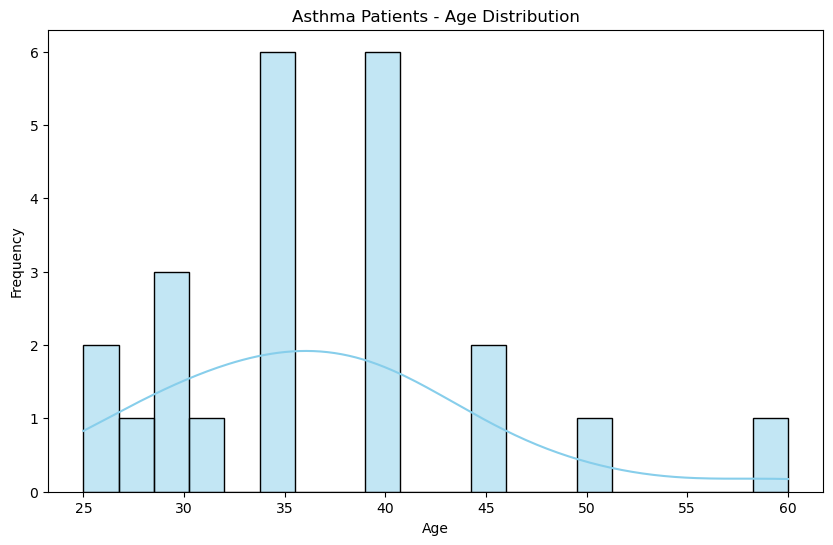

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(asthma['Age'], bins=20, kde=True, color='skyblue')
plt.title('Asthma Patients - Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


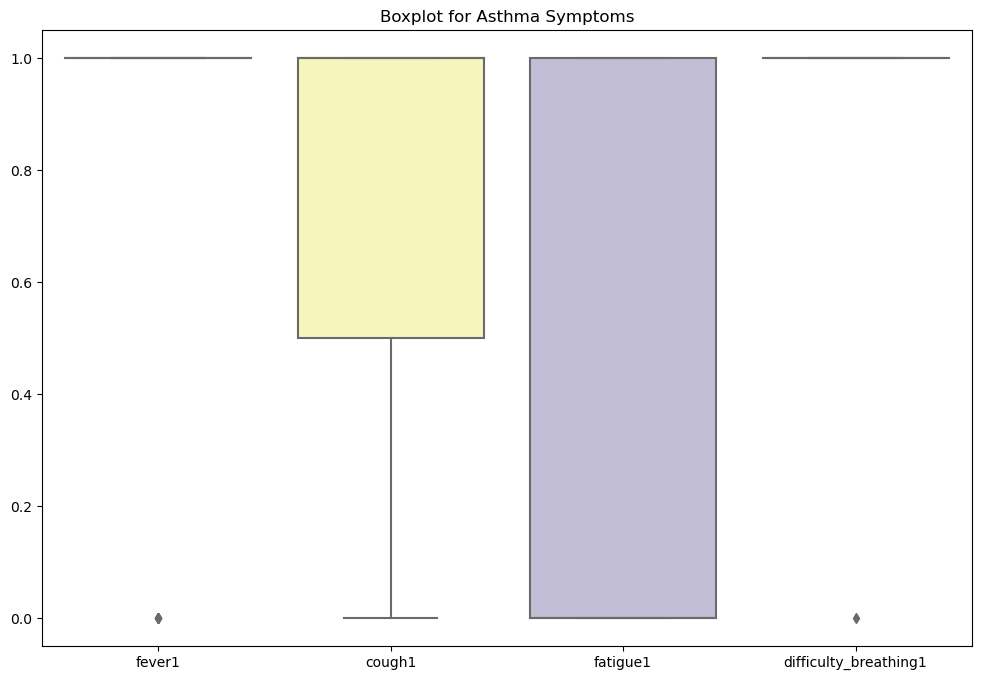

In [84]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=asthma_data[['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1']], palette='Set3')
plt.title('Boxplot for Asthma Symptoms')
plt.show()


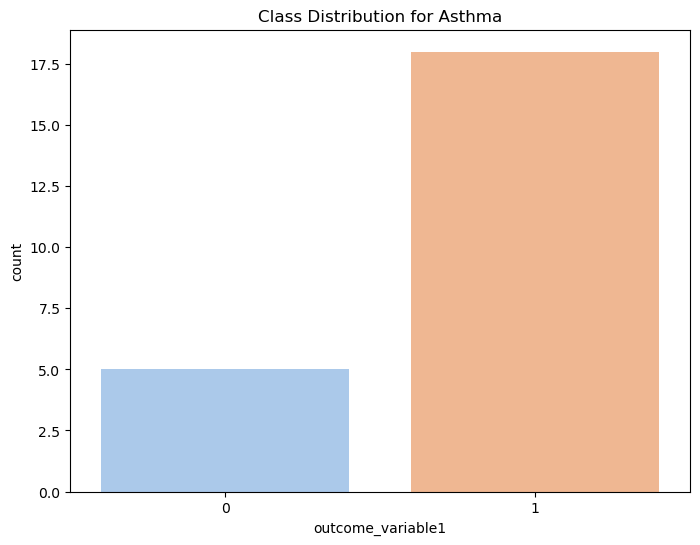

In [85]:
plt.figure(figsize=(8, 6))
sns.countplot(data=asthma, x='outcome_variable1', palette='pastel')
plt.title('Class Distribution for Asthma')
plt.show()


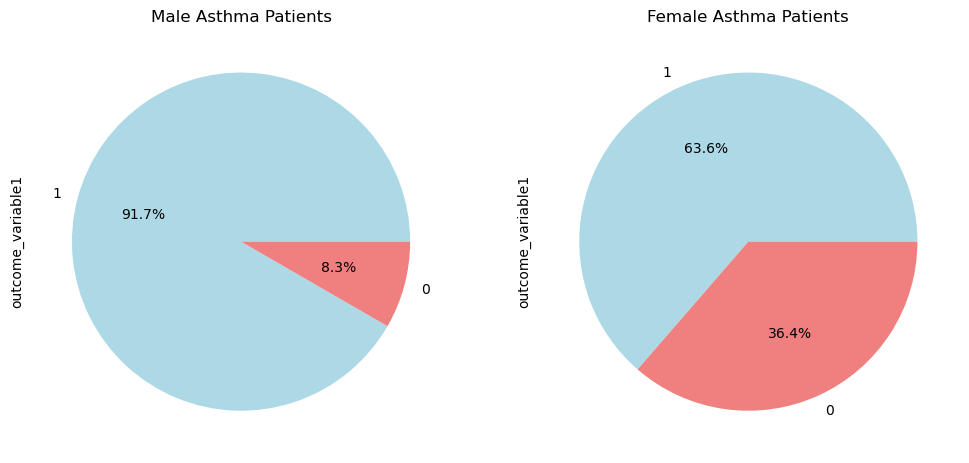

In [86]:
# Filtering Asthma patients based on gender
male_asthma = asthma[asthma['Gender'] == 'Male']
female_asthma = asthma[asthma['Gender'] == 'Female']

# Pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Asthma rate among male patients
male_asthma['outcome_variable1'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[0].set_title('Male Asthma Patients')

# Asthma rate among female patients
female_asthma['outcome_variable1'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1].set_title('Female Asthma Patients')

plt.show()


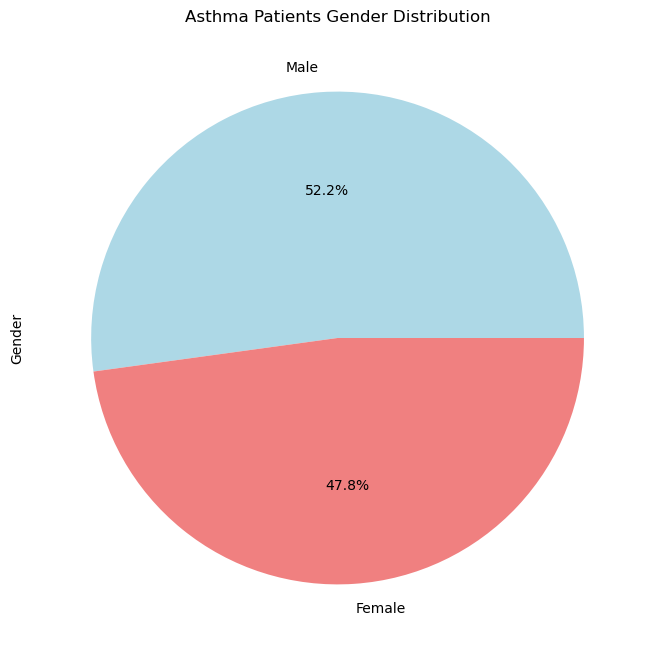

In [87]:
# Filtering Asthma patients based on gender
asthma_gender_distribution = asthma['Gender'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
asthma_gender_distribution.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Asthma Patients Gender Distribution')
plt.show()


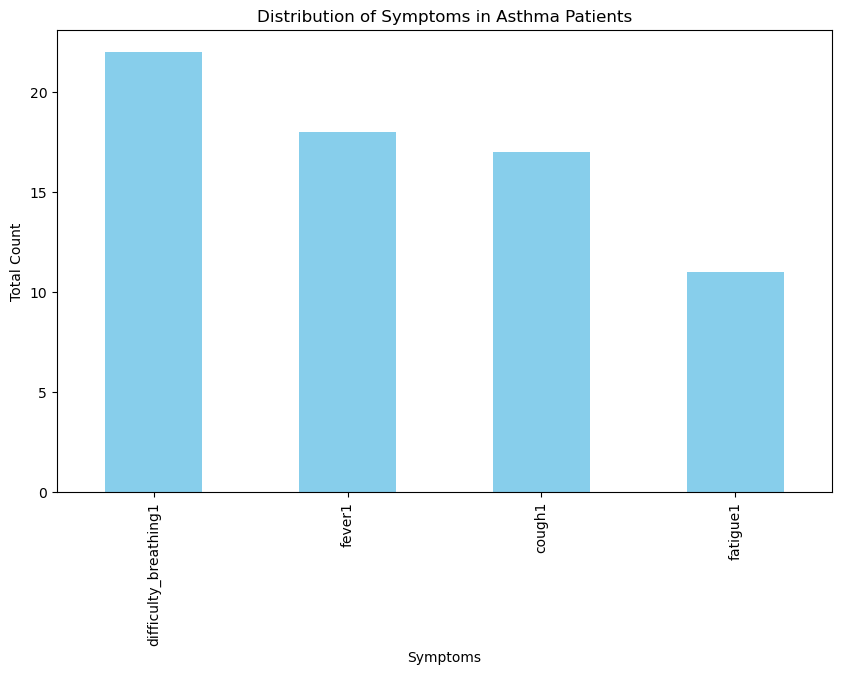

In [88]:
# Dataset containing symptoms of asthma patients
asthma_symptoms = asthma[['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1']]

# Calculate the total count for each symptom
symptom_counts = asthma_symptoms.sum()

# Bar chart creation
plt.figure(figsize=(10, 6))
symptom_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Symptoms in Asthma Patients')
plt.xlabel('Symptoms')
plt.ylabel('Total Count')
plt.show()



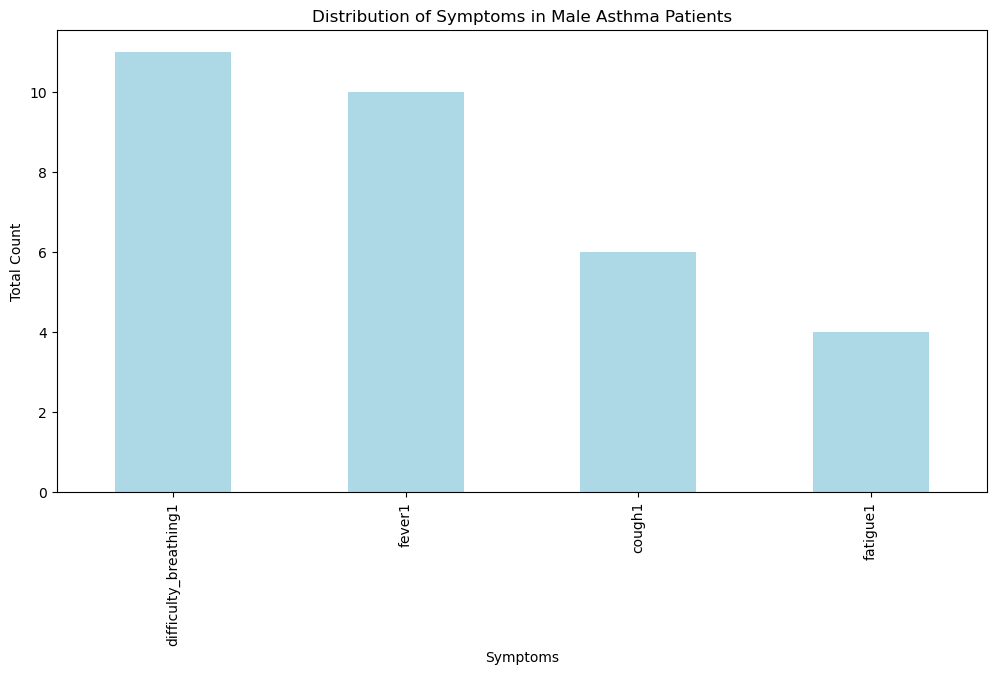

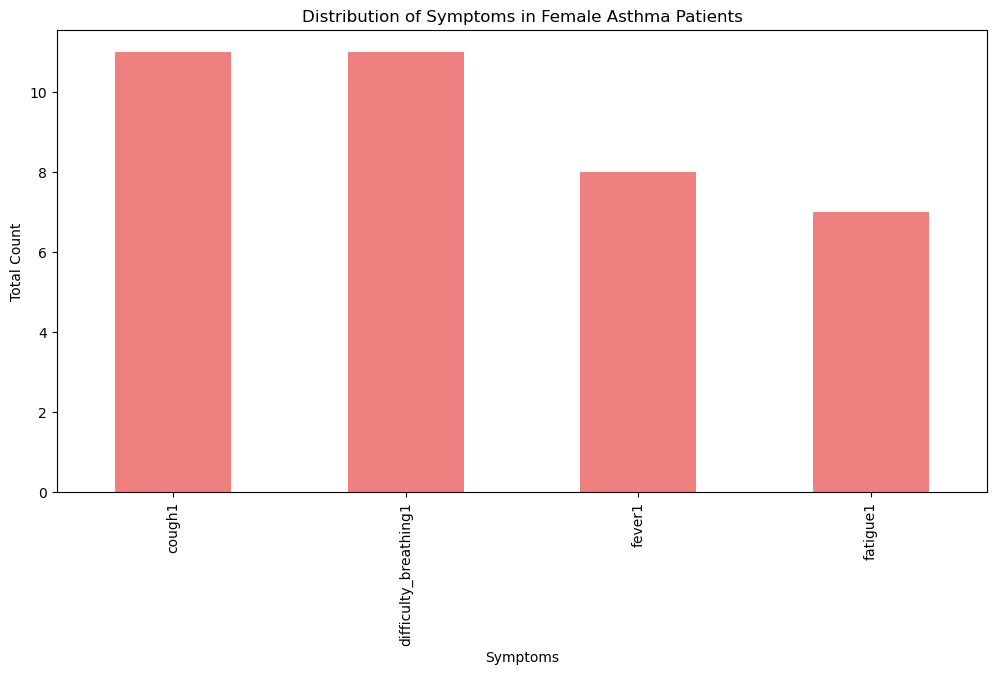

In [89]:
# Dataset containing symptoms of male asthma patients
male_asthma_symptoms = asthma[asthma['Gender'] == 'Male'][['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1']]

# Dataset containing symptoms of female asthma patients
female_asthma_symptoms = asthma[asthma['Gender'] == 'Female'][['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1']]

# Calculate the total count for each symptom
male_symptom_counts = male_asthma_symptoms.sum()
female_symptom_counts = female_asthma_symptoms.sum()

# Bar chart for male patients
plt.figure(figsize=(12, 6))
male_symptom_counts.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Distribution of Symptoms in Male Asthma Patients')
plt.xlabel('Symptoms')
plt.ylabel('Total Count')
plt.show()

# Bar chart for female patients
plt.figure(figsize=(12, 6))
female_symptom_counts.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Distribution of Symptoms in Female Asthma Patients')
plt.xlabel('Symptoms')
plt.ylabel('Total Count')
plt.show()



C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\2064787524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma['Outcome'] = asthma['outcome_variable1']
C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\2064787524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma['Outcome'] = asthma['Outcome'].map({1: 'Positive', 0: 'Negative'})


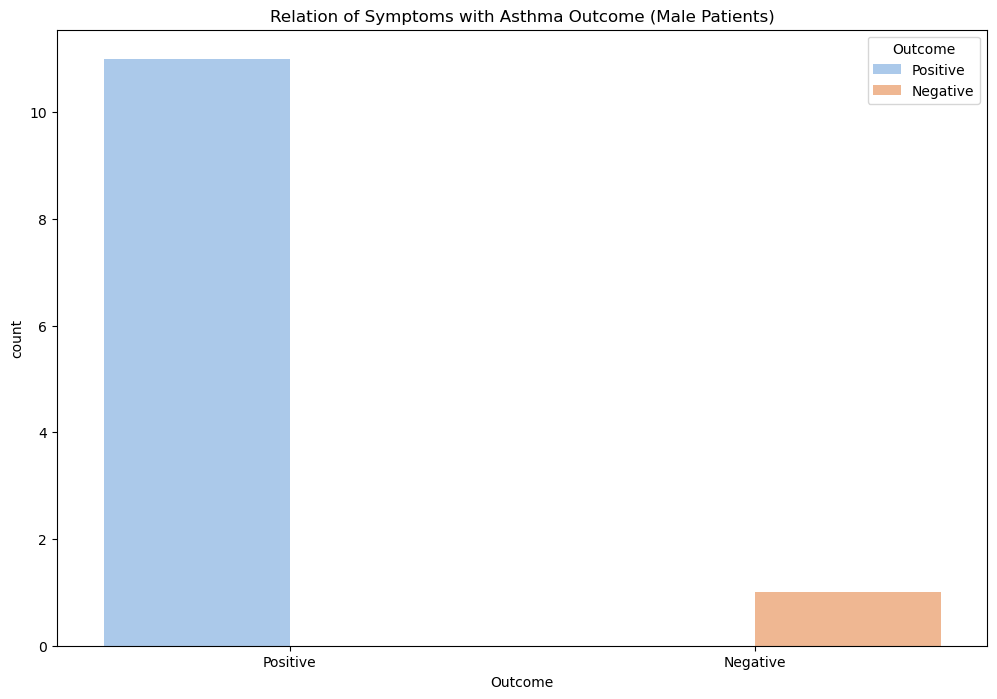

In [90]:
# Rename the 'outcome_variable1' column to 'Outcome'
asthma['Outcome'] = asthma['outcome_variable1']

# Create the 'Outcome' column containing 'Positive' and 'Negative' values
asthma['Outcome'] = asthma['Outcome'].map({1: 'Positive', 0: 'Negative'})

# Dataset containing symptoms of male asthma patients
male_asthma_data = asthma[asthma['Gender'] == 'Male'][['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1', 'Outcome']]

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=male_asthma_data, x='Outcome', hue='Outcome', palette='pastel')
plt.title('Relation of Symptoms with Asthma Outcome (Male Patients)')
plt.show()


In [91]:
# Display column names of the asthma dataframe
print(asthma.columns)

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable',
       'fever1', 'cough1', 'fatigue1', 'difficulty_breathing1',
       'blood_pressure1', 'cholesterol_level1', 'outcome_variable1',
       'Outcome'],
      dtype='object')


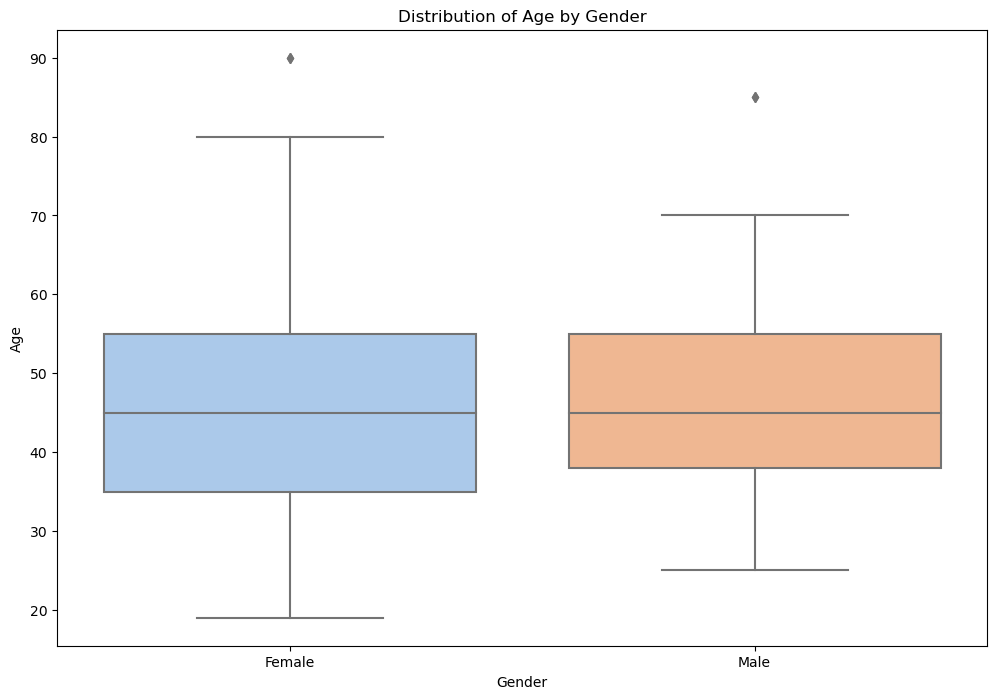

In [92]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Gender', y='Age', palette='pastel')
plt.title('Distribution of Age by Gender')
plt.show()

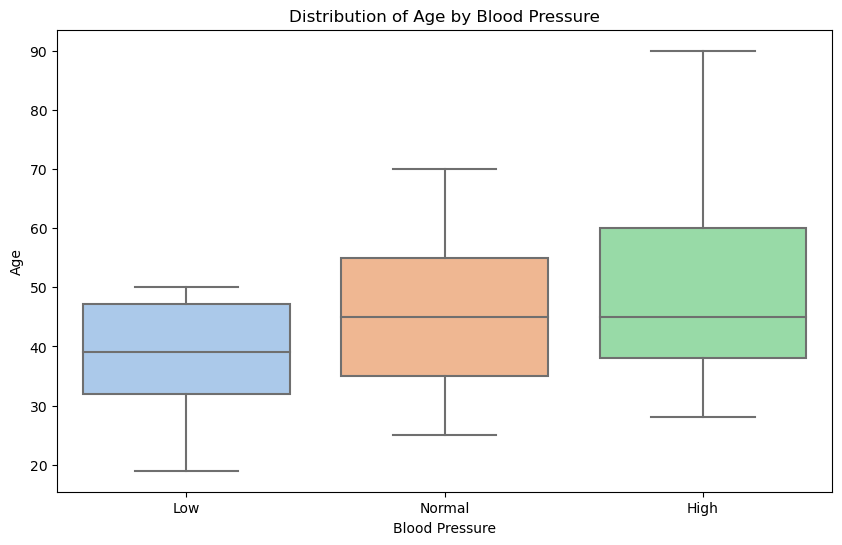

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Blood Pressure', y='Age', palette='pastel')
plt.title('Distribution of Age by Blood Pressure')
plt.show()


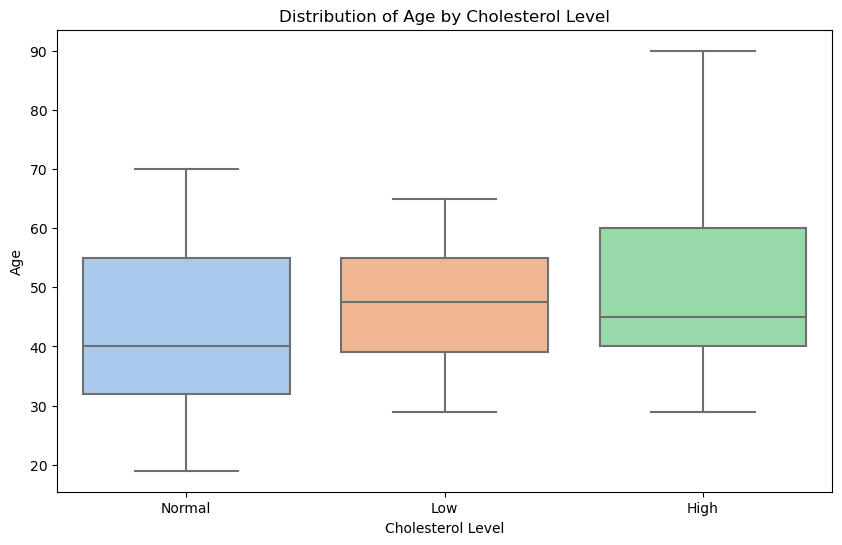

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Cholesterol Level', y='Age', palette='pastel')
plt.title('Distribution of Age by Cholesterol Level')
plt.show()


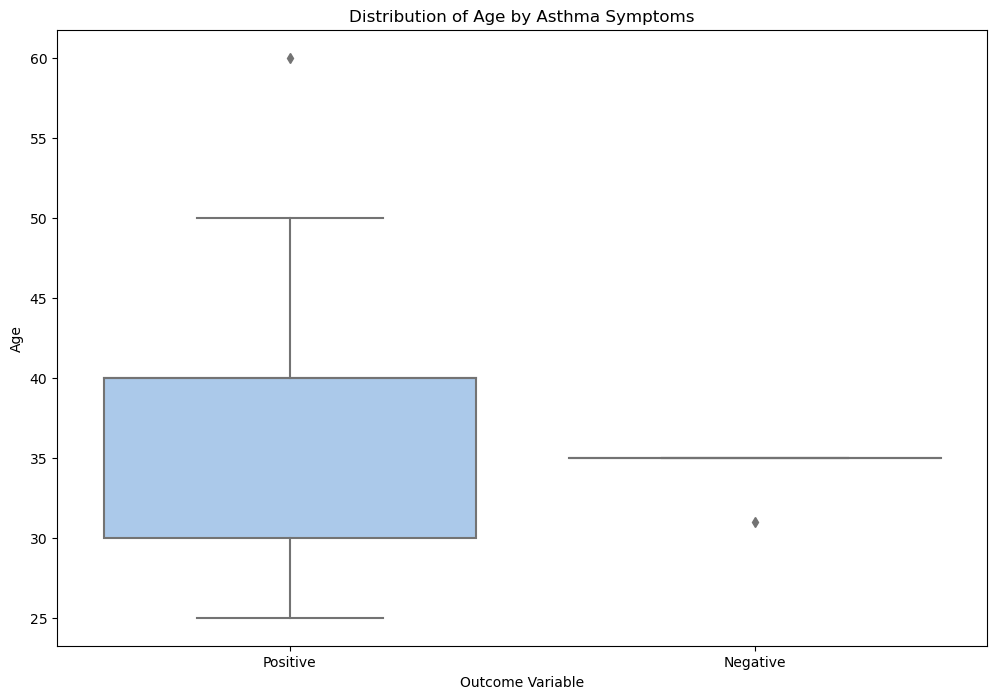

In [95]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=asthma, x='Outcome Variable', y='Age', palette='pastel')
plt.title('Distribution of Age by Asthma Symptoms')
plt.show()

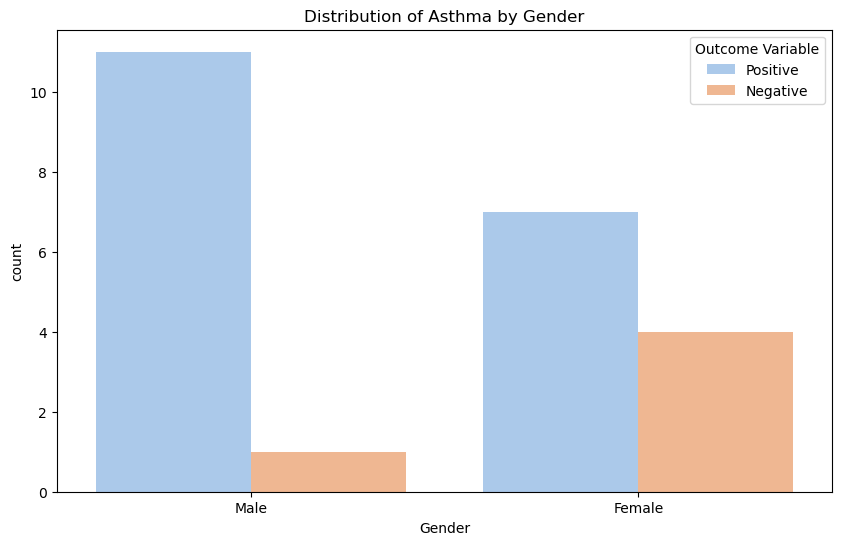

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=asthma, x='Gender', hue='Outcome Variable', palette='pastel')
plt.title('Distribution of Asthma by Gender')
plt.show()


C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\2832586562.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Blood Pressure', y='Age', hue='Outcome Variable', palette='pastel', ci=None)


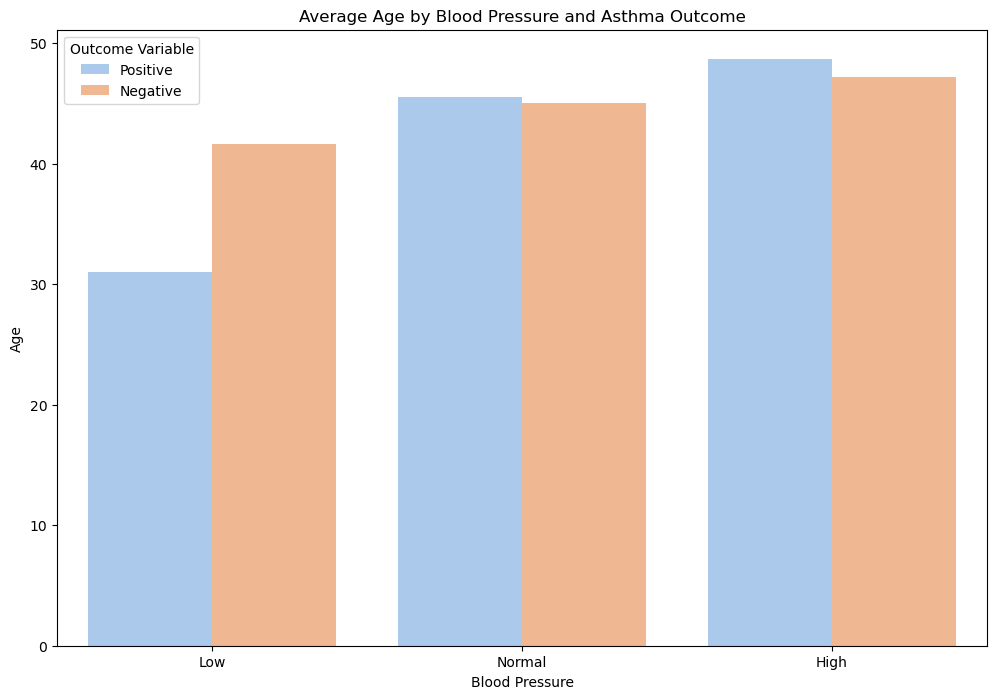

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Blood Pressure', y='Age', hue='Outcome Variable', palette='pastel', ci=None)
plt.title('Average Age by Blood Pressure and Asthma Outcome')
plt.show()


C:\Users\yekta\AppData\Local\Temp\ipykernel_19224\2522526229.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(asthma_data.corr(), annot=True, cmap='coolwarm')


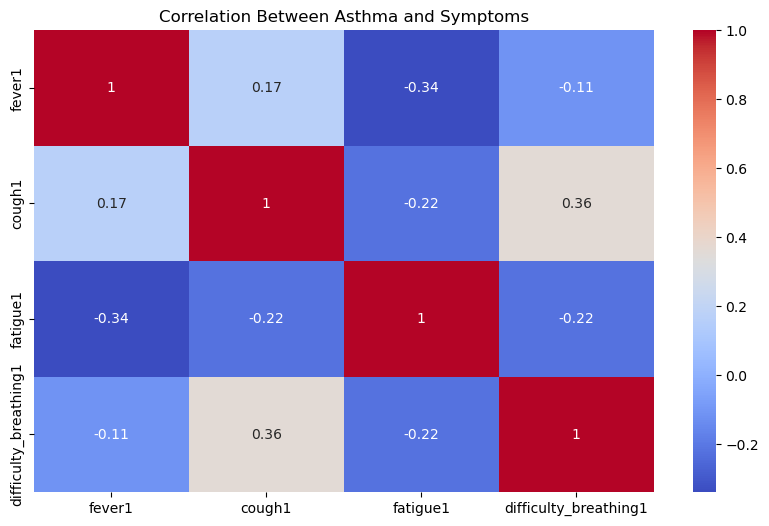

In [98]:
asthma_data = asthma[['fever1', 'cough1', 'fatigue1', 'difficulty_breathing1', 'Outcome Variable']]
plt.figure(figsize=(10, 6))
sns.heatmap(asthma_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Asthma and Symptoms')
plt.show()